# Revision of Lesson 1 and General Python Lessons

## Generate random ID numbers 

### Import the necessary Libraries  

In [5193]:
import numpy as np

In [5194]:
import pandas as pd

In [5195]:
import matplotlib.pyplot as plt

### Generate random D.O.B

In [5196]:
sample_size = 500

In [5197]:
dates = pd.date_range(start='1994-01-01', end='2004-12-31')

In [5198]:
sample_data = {
  'Date_Of_Birth': np.random.choice(dates,sample_size),
  'Gender': np.random.choice(['Male','Female'],sample_size),
  'Citizen': np.random.choice(['RSA','Other'],sample_size),
  'Race': np.random.choice(['African','White','Asian','Indian','Arab'],sample_size)
}
df_ID_no = pd.DataFrame(sample_data)

### Save to CSV

In [5199]:
df_ID_no.to_csv(r'C:\Users\Itumeleng.Sekoma\Desktop\Test777777\.ipynb_checkpoints\Identification.csv', index=False)

### Inspect DataFrame

In [5200]:
df_ID_no.head()

,Date_Of_Birth,Gender,Citizen,Race
0,2004-07-29,Female,Other,Asian
1,2002-01-08,Female,Other,Indian
2,1996-06-29,Male,Other,African
3,2003-03-22,Female,RSA,African
4,1999-12-02,Male,RSA,Asian


In [5201]:
df_ID_no.tail()

,Date_Of_Birth,Gender,Citizen,Race
495,2003-11-04,Female,RSA,White
496,2001-07-04,Female,RSA,White
497,1997-08-01,Male,RSA,African
498,2000-08-31,Female,Other,Indian
499,1998-02-12,Male,Other,White


In [5202]:
df_ID_no.describe()

,Date_Of_Birth
count,500
mean,1999-06-04 11:08:09.600000
min,1994-01-11 00:00:00
25%,1996-06-19 00:00:00
50%,1999-07-06 12:00:00
75%,2002-01-19 18:00:00
max,2004-12-25 00:00:00


In [5203]:
df_ID_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_Of_Birth  500 non-null    datetime64[ns]
 1   Gender         500 non-null    object        
 2   Citizen        500 non-null    object        
 3   Race           500 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 15.8+ KB


In [5204]:
df_ID_no['ID_Numbers'] = df_ID_no['Date_Of_Birth'].dt.strftime('%y%m%d')

In [5205]:
def generate_gender_digits(gender):
    if gender == 'Female':
        return np.random.randint(0, 5000)  # Female: 0000-4999
    else:
        return np.random.randint(5000, 8001)  # Male: 5000-8000

# Apply the function to generate 4-digit numbers based on gender
df_ID_no['Gender_Digits'] = df_ID_no['Gender'].apply(generate_gender_digits)

# Convert the 4-digit number to a zero-padded string
df_ID_no['Gender_Digits'] = df_ID_no['Gender_Digits'].apply(lambda x: f'{x:04d}')

# Concatenate the 6-digit ID_Numbers and 4-digit Gender_Digits
df_ID_no['ID_Numbers'] = df_ID_no['ID_Numbers'] + df_ID_no['Gender_Digits']

In [5206]:
def generate_citizenship_digits(Citizen):
    if Citizen == 'Other':
         return np.random.choice(['082','083','085','086']) 
    else:
        return '084' 
       

# Apply the function to generate 4-digit numbers based on gender
df_ID_no['Citizenship_Digits'] = df_ID_no['Citizen'].apply(generate_citizenship_digits)

# Concatenate the 6-digit ID_Numbers and 4-digit Gender_Digits
df_ID_no['ID_Numbers'] += df_ID_no['Citizenship_Digits']

In [5207]:
df_ID_no.tail()

,Date_Of_Birth,Gender,Citizen,Race,ID_Numbers,Gender_Digits,Citizenship_Digits
495,2003-11-04,Female,RSA,White,0311042600084,2600,084
496,2001-07-04,Female,RSA,White,0107043118084,3118,084
497,1997-08-01,Male,RSA,African,9708017449084,7449,084
498,2000-08-31,Female,Other,Indian,0008311063082,1063,082
499,1998-02-12,Male,Other,White,9802125984085,5984,085


In [5208]:
df_ID_no.to_csv(r'C:\Users\Itumeleng.Sekoma\Desktop\Test777777\.ipynb_checkpoints\Identification.csv', index=False)

In [5209]:
df_ID_no[['ID_Numbers','Date_Of_Birth','Gender','Citizen']].head()

,ID_Numbers,Date_Of_Birth,Gender,Citizen
0,0407294268082,2004-07-29,Female,Other
1,0201081136085,2002-01-08,Female,Other
2,9606296545086,1996-06-29,Male,Other
3,0303224826084,2003-03-22,Female,RSA
4,9912026506084,1999-12-02,Male,RSA


In [5210]:
df_ID_no[['ID_Numbers','Date_Of_Birth','Gender','Citizen']].tail()

,ID_Numbers,Date_Of_Birth,Gender,Citizen
495,0311042600084,2003-11-04,Female,RSA
496,0107043118084,2001-07-04,Female,RSA
497,9708017449084,1997-08-01,Male,RSA
498,0008311063082,2000-08-31,Female,Other
499,9802125984085,1998-02-12,Male,Other


### Check how many records belong to RSA Citizens compared to citizens from other countries 

In [5211]:
RSA_Citizens = (df_ID_no['Citizen'] == 'RSA').sum()
print(RSA_Citizens)


230


In [5212]:
Foriegn_Citizens = (df_ID_no['Citizen'] == 'Other').sum()
print(Foriegn_Citizens)

270


In [5213]:
sizes = [RSA_Citizens,Foriegn_Citizens]

In [5214]:
citizenship_labels = ['RSA Citizen','Foriegn Citizen']

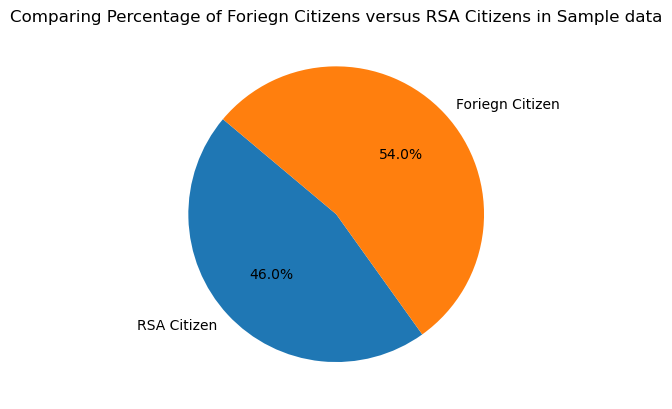

In [5215]:
plt.pie(sizes,labels=citizenship_labels,autopct='%1.1f%%',startangle=140)
plt.title('Comparing Percentage of Foriegn Citizens versus RSA Citizens in Sample data')
plt.show()

### Compare Percentage of Malaes to female and Visualise findings

In [5216]:
gender_size = df_ID_no['Gender'].value_counts()
print(gender_size)

Gender
Male      252
Female    248
Name: count, dtype: int64


In [5217]:
gender_labels = ['Males','Females']

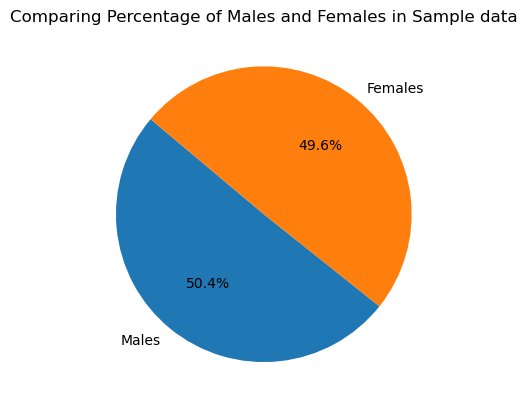

In [5218]:
plt.pie(gender_size,labels=gender_labels,autopct='%1.1f%%',startangle=140)
plt.title('Comparing Percentage of Males and Females in Sample data')
plt.show()